In [1]:
from __future__ import division
from IPython.display import clear_output
import numpy as np
import gym
import matplotlib.pyplot as plt
from IPython import display
import random

%load_ext autoreload
%autoreload 2

# how to render in Jupyter: 
# https://stackoverflow.com/questions/40195740/how-to-run-openai-gym-render-over-a-server
# https://www.youtube.com/watch?v=O85KgRt6AJI
def show_state(env, step=0, name='', info=''):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render())
    plt.title("%s | Step: %d %s" % (name, step, info))
    plt.axis('off')

    display.clear_output(wait=True)
    display.display(plt.gcf())
    
# To transform pixel matrix to a single vector.
def getState(inState):
    # each row is all 1 color
    rgbRows = np.reshape(inState,(len(inState[0])*len(inState), 3)).T

    # add each with appropriate shifting
    # get RRRRRRRR GGGGGGGG BBBBBBBB
    return np.add(np.left_shift(rgbRows[0], 16),
        np.add(np.left_shift(rgbRows[1], 8), rgbRows[2]))



In [2]:
# import to do training
from tpg.trainer import Trainer
# import to run an agent (always needed)
from tpg.agent import Agent

from tpg.configurations import DefaultConfiguration

In [3]:
env = gym.make('CartPole-v1', render_mode='rgb_array') # make the environment

print(env.action_space) # learn size of action space

Discrete(2)


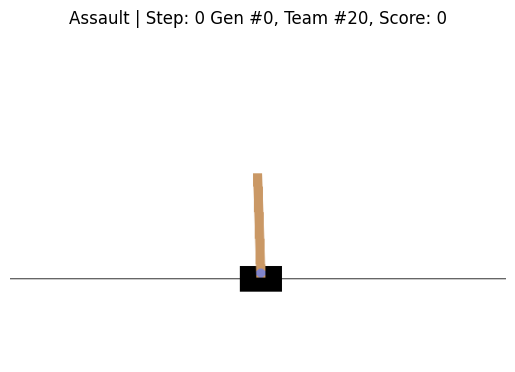

> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(62)execute()
     61             # get data for operation
---> 62             op = ops[i]
     63             x = regs[dsts[i]]

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(63)execute()
     62             op = ops[i]
---> 63             x = regs[dsts[i]]
     64             y = src

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(64)execute()
     63             x = regs[dsts[i]]
---> 64             y = src
     65             dest = dsts[i]%regSize

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(65)execute()
     64             y = src
---> 65             dest = dsts[i]%regSize
     66 

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(68)execute()
     67             # do an operation
---> 68             if op == 0:
     69                 regs[dest] = x+y

ipdb> op
4
ipdb> modes
array([1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(53)execute()
     52             # first get source
---> 53             if modes[i] == 0:
     54                 src = regs[srcs[i]%regSize]

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(54)execute()
     53             if modes[i] == 0:
---> 54                 src = regs[srcs[i]%regSize]
     55             # we need to add an additional mode for memory addressing

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(59)execute()
     58 
---> 59             ipdb.set_trace()
     60 

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(62)execute()
     61             # get data for operation
---> 62             op = ops[i]
     63             x = regs[dsts[i]]

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(63)execute()
     62             op = ops[i]
---> 63             x = regs[dsts[i]]
     64             y = src

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(64)execute()
     63             x 

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(51)execute()
     50         inptLen = len(inpt)
---> 51         for i in range(len(modes)):
     52             # first get source

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(53)execute()
     52             # first get source
---> 53             if modes[i] == 0:
     54                 src = regs[srcs[i]%regSize]

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(54)execute()
     53             if modes[i] == 0:
---> 54                 src = regs[srcs[i]%regSize]
     55             # we need to add an additional mode for memory addressing

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(59)execute()
     58 
---> 59             ipdb.set_trace()
     60 

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(62)execute()
     61             # get data for operation
---> 62             op = ops[i]
     63             x = regs[dsts[i]]

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(63)execute()
 

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(54)execute()
     53             if modes[i] == 0:
---> 54                 src = regs[srcs[i]%regSize]
     55             # we need to add an additional mode for memory addressing

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(59)execute()
     58 
---> 59             ipdb.set_trace()
     60 

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(62)execute()
     61             # get data for operation
---> 62             op = ops[i]
     63             x = regs[dsts[i]]

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(63)execute()
     62             op = ops[i]
---> 63             x = regs[dsts[i]]
     64             y = src

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(64)execute()
     63             x = regs[dsts[i]]
---> 64             y = src
     65             dest = dsts[i]%regSize

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(65)execute()
     64             y = src
---> 65       

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(62)execute()
     61             # get data for operation
---> 62             op = ops[i]
     63             x = regs[dsts[i]]

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(63)execute()
     62             op = ops[i]
---> 63             x = regs[dsts[i]]
     64             y = src

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(64)execute()
     63             x = regs[dsts[i]]
---> 64             y = src
     65             dest = dsts[i]%regSize

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(65)execute()
     64             y = src
---> 65             dest = dsts[i]%regSize
     66 

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(68)execute()
     67             # do an operation
---> 68             if op == 0:
     69                 regs[dest] = x+y

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(70)execute()
     69                 regs[dest] = x+y
---> 70             elif op == 1:

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(62)execute()
     61             # get data for operation
---> 62             op = ops[i]
     63             x = regs[dsts[i]]

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(63)execute()
     62             op = ops[i]
---> 63             x = regs[dsts[i]]
     64             y = src

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(64)execute()
     63             x = regs[dsts[i]]
---> 64             y = src
     65             dest = dsts[i]%regSize

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(65)execute()
     64             y = src
---> 65             dest = dsts[i]%regSize
     66 

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(68)execute()
     67             # do an operation
---> 68             if op == 0:
     69                 regs[dest] = x+y

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(70)execute()
     69                 regs[dest] = x+y
---> 70             elif op == 1:

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(63)execute()
     62             op = ops[i]
---> 63             x = regs[dsts[i]]
     64             y = src

ipdb> nn
*** NameError: name 'nn' is not defined
ipdb> 
*** NameError: name 'nn' is not defined
ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(64)execute()
     63             x = regs[dsts[i]]
---> 64             y = src
     65             dest = dsts[i]%regSize

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(65)execute()
     64             y = src
---> 65             dest = dsts[i]%regSize
     66 

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(68)execute()
     67             # do an operation
---> 68             if op == 0:
     69                 regs[dest] = x+y

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(70)execute()
     69                 regs[dest] = x+y
---> 70             elif op == 1:
     71                 regs[dest] = x-y

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/p

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(57)execute()
     56             elif modes[i] == 1:
---> 57                 src = inpt[srcs[i]%inptLen]
     58 

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(59)execute()
     58 
---> 59             ipdb.set_trace()
     60 

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(62)execute()
     61             # get data for operation
---> 62             op = ops[i]
     63             x = regs[dsts[i]]

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(63)execute()
     62             op = ops[i]
---> 63             x = regs[dsts[i]]
     64             y = src

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(64)execute()
     63             x = regs[dsts[i]]
---> 64             y = src
     65             dest = dsts[i]%regSize

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(65)execute()
     64             y = src
---> 65             dest = dsts[i]%regSize
     66 

ipdb> n
> /home/bryce/Deskto

ipdb> y
0.025947144
ipdb> modes[i]
1
ipdb> srcs[i]
12108
ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(83)execute()
     82                 regs[dest] = memory.read(srcs[i])
---> 83             elif op == 7:
     84                 memory.write(y)

ipdb> y
0.025947144
ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(84)execute()
     83             elif op == 7:
---> 84                 memory.write(y)
     85 

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(87)execute()
     86 
---> 87             if math.isnan(regs[dest]):
     88                 regs[dest] = 0

ipdb> memory.registers
array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.   

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(51)execute()
     50         inptLen = len(inpt)
---> 51         for i in range(len(modes)):
     52             # first get source

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(53)execute()
     52             # first get source
---> 53             if modes[i] == 0:
     54                 src = regs[srcs[i]%regSize]

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(54)execute()
     53             if modes[i] == 0:
---> 54                 src = regs[srcs[i]%regSize]
     55             # we need to add an additional mode for memory addressing

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(59)execute()
     58 
---> 59             ipdb.set_trace()
     60 

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(62)execute()
     61             # get data for operation
---> 62             op = ops[i]
     63             x = regs[dsts[i]]

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(63)execute()
 

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(84)execute()
     83             elif op == 7:
---> 84                 memory.write(y)
     85 

ipdb> y
0.0
ipdb> op
7
ipdb> src
0.0
ipdb> srcs[i]
28351
ipdb> regs
array([ 0.        , -0.99933544,  0.        ,  0.        ,  0.99966339,
        0.99933544, -0.99933544,  0.        ])
ipdb> srcs[i] % regSize
7
ipdb> regs[7]
0.0
ipdb> 
0.0
ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(87)execute()
     86 
---> 87             if math.isnan(regs[dest]):
     88                 regs[dest] = 0

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(89)execute()
     88                 regs[dest] = 0
---> 89             elif regs[dest] == np.inf:
     90                 regs[dest] = np.finfo(np.float64).max

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(91)execute()
     90                 regs[dest] = np.finfo(np.float64).max
---> 91             elif regs[dest] == np.NINF:
     92                 regs[dest] = np.finfo(n

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(72)execute()
     71                 regs[dest] = x-y
---> 72             elif op == 2:
     73                 regs[dest] = x*2

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(74)execute()
     73                 regs[dest] = x*2
---> 74             elif op == 3:
     75                 regs[dest] = x/2

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(76)execute()
     75                 regs[dest] = x/2
---> 76             elif op == 4:
     77                 regs[dest] = math.cos(y)

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(78)execute()
     77                 regs[dest] = math.cos(y)
---> 78             elif op == 5:
     79                 if x < y:

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(79)execute()
     78             elif op == 5:
---> 79                 if x < y:
     80                     regs[dest] = x*(-1)

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(87)execute(

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(65)execute()
     64             y = src
---> 65             dest = dsts[i]%regSize
     66 

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(68)execute()
     67             # do an operation
---> 68             if op == 0:
     69                 regs[dest] = x+y

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(70)execute()
     69                 regs[dest] = x+y
---> 70             elif op == 1:
     71                 regs[dest] = x-y

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(72)execute()
     71                 regs[dest] = x-y
---> 72             elif op == 2:
     73                 regs[dest] = x*2

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(74)execute()
     73                 regs[dest] = x*2
---> 74             elif op == 3:
     75                 regs[dest] = x/2

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(76)execute()
     75                 regs[dest] = x/2
---> 76

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(59)execute()
     58 
---> 59             ipdb.set_trace()
     60 

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(62)execute()
     61             # get data for operation
---> 62             op = ops[i]
     63             x = regs[dsts[i]]

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(63)execute()
     62             op = ops[i]
---> 63             x = regs[dsts[i]]
     64             y = src

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(64)execute()
     63             x = regs[dsts[i]]
---> 64             y = src
     65             dest = dsts[i]%regSize

ipdb> i
11
ipdb> op
7
ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(65)execute()
     64             y = src
---> 65             dest = dsts[i]%regSize
     66 

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(68)execute()
     67             # do an operation
---> 68             if op == 0:
     69                 regs[dest] = x

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(89)execute()
     88                 regs[dest] = 0
---> 89             elif regs[dest] == np.inf:
     90                 regs[dest] = np.finfo(np.float64).max

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(91)execute()
     90                 regs[dest] = np.finfo(np.float64).max
---> 91             elif regs[dest] == np.NINF:
     92                 regs[dest] = np.finfo(np.float64).min

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(51)execute()
     50         inptLen = len(inpt)
---> 51         for i in range(len(modes)):
     52             # first get source

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(53)execute()
     52             # first get source
---> 53             if modes[i] == 0:
     54                 src = regs[srcs[i]%regSize]

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(54)execute()
     53             if modes[i] == 0:
---> 54                 src = regs[srcs[i]%regSize

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(81)execute()
     80                     regs[dest] = x*(-1)
---> 81             elif op == 6:
     82                 regs[dest] = memory.read(srcs[i])

ipdb> regs[dest]
0.5408613983816389
ipdb> dest
3
ipdb> regs
array([ 0.        , -0.99933544,  0.        ,  0.5408614 ,  0.99966339,
        0.99933544, -0.99933544,  0.        ])
ipdb> srcs[i]
13076
ipdb> memory.read(srcs[i])


0.0
ipdb> 


0.0
ipdb> 


0.0
ipdb> regs[dest]
0.5408613983816389
ipdb> regs
array([ 0.        , -0.99933544,  0.        ,  0.5408614 ,  0.99966339,
        0.99933544, -0.99933544,  0.        ])
ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(82)execute()
     81             elif op == 6:
---> 82                 regs[dest] = memory.read(srcs[i])
     83             elif op == 7:

ipdb> n


> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(87)execute()
     86 
---> 87             if math.isnan(regs[dest]):
     88                 regs[dest] = 0

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(89)execute()
     88                 regs[dest] = 0
---> 89             elif regs[dest] == np.inf:
     90                 regs[dest] = np.finfo(np.float64).max

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(91)execute()
     90                 regs[dest] = np.finfo(np.float64).max
---> 91             elif regs[dest] == np.NINF:
     92                 regs[dest] = np.finfo(np.float64).min

ipdb> n
> /home/bryce/Desktop/tpg/PyTPG/tpg/program.py(51)execute()
     50         inptLen = len(inpt)
---> 51         for i in range(len(modes)):
     52             # first get source

ipdb> regs
array([ 0.        , -0.99933544,  0.        ,  0.        ,  0.99966339,
        0.99933544, -0.99933544,  0.        ])


In [ ]:
## %matplotlib inline
import time # for tracking time

tStart = time.time()

customConfig = DefaultConfiguration()
customConfig.teamPopSize = 20
customConfig.isPhasicEvolutionEnabled = True
customConfig.phasicEvolutionThreshold = 0.30
customConfig.totalGenerations = 5

# first create an instance of the TpgTrainer
# this creates the whole population and everything
# teamPopSize should realistically be at-least 100
trainer = Trainer(actions=range(2), config=customConfig) 

curScores = [] # hold scores in a generation
summaryScores = [] # record score summaries for each gen (min, max, avg)

# 5 generations isn't much (not even close), but some improvements
# should be seen.
for gen in range(5): # generation loop
    curScores = [] # new list per gen
    
    agents = trainer.getAgents()
    
    while True: # loop to go through agents
        teamNum = len(agents)
        agent = agents.pop()
        if agent is None:
            break # no more agents, so proceed to next gen
        
        state = env.reset()[0] # get initial state and prep environment
        score = 0
        for i in range(500): # run episodes that last 500 frames
            show_state(env, i, 'Assault', 'Gen #' + str(gen) + 
                       ', Team #' + str(teamNum) +
                       ', Score: ' + str(score)) # render env
            
            # must transform to at-least int-32 (for my getState to bitshift correctly)
            # print(state)
            #print(state)
             
            act = agent.act(state) 

            # feedback from env
            #print("act", act[0])
            print(act)

            state, reward, isTerminated, isTruncated, debug = env.step(act[0])
            
            score += reward # accumulate reward in score
            if isTerminated or isTruncated:
                break # end early if losing state

        agent.reward(score) # must reward agent (if didn't already score)
            
        curScores.append(score) # store score
        
        if len(agents) == 0:
            break
            
    # at end of generation, make summary of scores
    summaryScores.append((min(curScores), max(curScores),
                    sum(curScores)/len(curScores))) # min, max, avg
    trainer.evolve()
    
#clear_output(wait=True)
print('Time Taken (Hours): ' + str((time.time() - tStart)/3600))
print('Results:\nMin, Max, Avg')
for result in summaryScores:
    print(result[0],result[1],result[2])